   Sr No  Year  No of Accidents  Derailments  Collisions  Collisions at LC  \
0      1  2016               24           10           4                 9   
1      2  2017                5            4           1                 0   
2      3  2018               11            8           0                 3   
3      4  2019               18            8           2                 8   
4      5  2020                8            3           1                 4   

   Fire Accidents  Overshooting   
0               0              1  
1               0              0  
2               0              0  
3               0              0  
4               0              0  
Sr No               0
Year                0
No of Accidents     0
Derailments         0
Collisions          0
Collisions at LC    0
Fire Accidents      0
Overshooting        0
dtype: int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No of Accidents   No. Observati

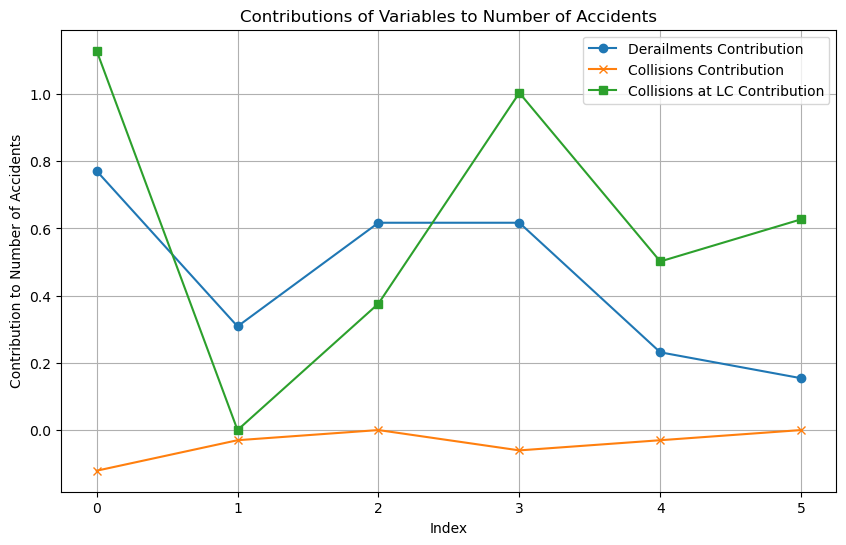

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Rawalpindi.xlsx'
sheet_name = 'accident types'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Inspect the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data cleaning (if necessary)
# For example, fill missing values
df = df.fillna(method='ffill')

# Define the dependent (response) and independent (predictor) variables
X = df[['Derailments', 'Collisions', 'Collisions at LC']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Specify the GLM with a Poisson distribution and log link function
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_results = glm_poisson.fit()
summary = glm_poisson_results.summary()
print(summary)

# Deviance and AIC are directly available
print(f"Deviance: {glm_poisson_results.deviance}")
print(f"AIC: {glm_poisson_results.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = glm_poisson_results.null_deviance
pseudo_r_squared = 1 - (glm_poisson_results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")



# Plotting contributions of each variable
plt.figure(figsize=(10, 6))

# Derailments
plt.plot(df.index, df['Derailments'] * glm_poisson_results.params['Derailments'], label='Derailments Contribution', marker='o')

# Collisions
plt.plot(df.index, df['Collisions'] * glm_poisson_results.params['Collisions'], label='Collisions Contribution', marker='x')

# Collisions at LC
plt.plot(df.index, df['Collisions at LC'] * glm_poisson_results.params['Collisions at LC'], label='Collisions at LC Contribution', marker='s')

plt.xlabel('Index')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents.png')
plt.show()


   Year  No of Accidents  Accidents at Track  Accidents in Station Limits
0  2016               24                  13                           11
1  2017                5                   1                            4
2  2018               11                   3                            8
3  2019               18                  10                            8
4  2020                8                   5                            3
Year                           0
No of Accidents                0
Accidents at Track             0
Accidents in Station Limits    0
dtype: int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No of Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:         

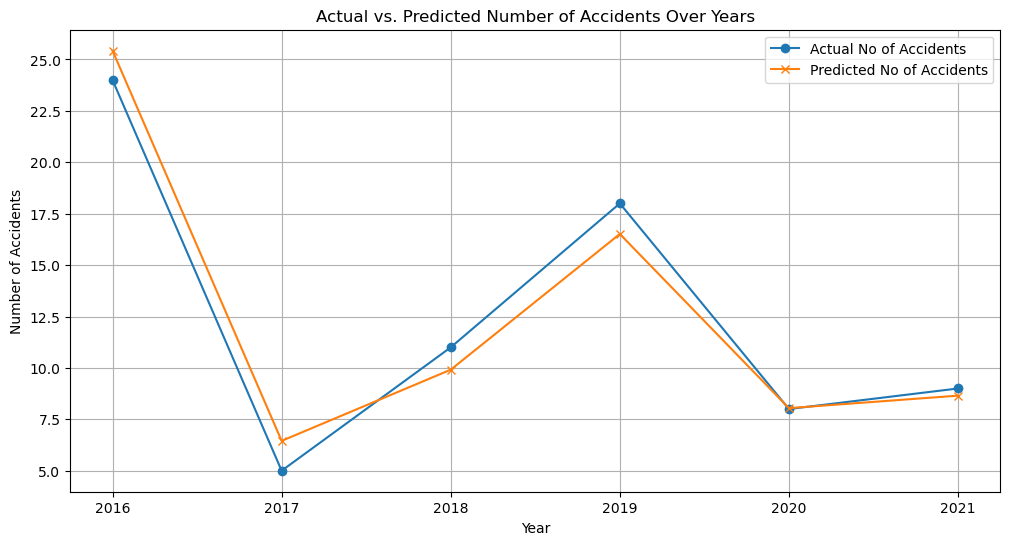

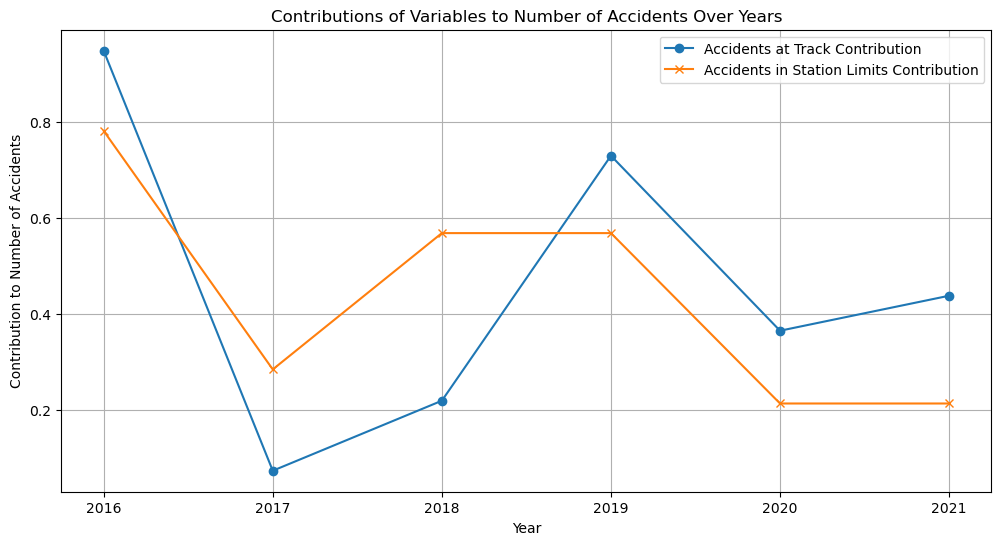

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Rawalpindi.xlsx'
sheet_name = 'Location of Accidents'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Inspect the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data cleaning (if necessary)
# For example, fill missing values
df = df.fillna(method='ffill')

# Define the dependent (response) and independent (predictor) variables
X = df[['Accidents at Track', 'Accidents in Station Limits']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Specify the GLM with Poisson distribution and log link function
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_results = glm_poisson.fit()
summary = glm_poisson_results.summary()
print(summary)

# Deviance and AIC are directly available
print(f"Deviance: {glm_poisson_results.deviance}")
print(f"AIC: {glm_poisson_results.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = glm_poisson_results.null_deviance
pseudo_r_squared = 1 - (glm_poisson_results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")


# Plotting contributions of each variable
plt.figure(figsize=(12, 6))

# Accidents at Track
plt.plot(df['Year'], df['Accidents at Track'] * glm_poisson_results.params['Accidents at Track'], label='Accidents at Track Contribution', marker='o')

# Accidents in Station Limits
plt.plot(df['Year'], df['Accidents in Station Limits'] * glm_poisson_results.params['Accidents in Station Limits'], label='Accidents in Station Limits Contribution', marker='x')

plt.xlabel('Year')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents Over Years')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents_location.png')
plt.show()


In [17]:
import pandas as pd
import statsmodels.api as sm

# Load the data
file_path = 'Rawalpindi.xlsx'
sheet_name = 'type of line'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Define the dependent (response) variable
y = df['No_of_Accidents']

# Test GLM with Main Line only
X_main_line = sm.add_constant(df[['Main_Line']])
glm_poisson_main_line = sm.GLM(y, X_main_line, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_main_line_results = glm_poisson_main_line.fit()
print("GLM Summary with Main Line Only:")
print(glm_poisson_main_line_results.summary())
print(f"Deviance: {glm_poisson_main_line_results.deviance}")
print(f"AIC: {glm_poisson_main_line_results.aic}")

# Test GLM with Branch Line only
X_branch_line = sm.add_constant(df[['Branch_Line']])
glm_poisson_branch_line = sm.GLM(y, X_branch_line, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_branch_line_results = glm_poisson_branch_line.fit()
print("GLM Summary with Branch Line Only:")
print(glm_poisson_branch_line_results.summary())
print(f"Deviance: {glm_poisson_branch_line_results.deviance}")
print(f"AIC: {glm_poisson_branch_line_results.aic}")


GLM Summary with Main Line Only:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    4
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.614
Date:                Sun, 04 Aug 2024   Deviance:                       7.3817
Time:                        01:11:02   Pearson chi2:                     6.25
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.36

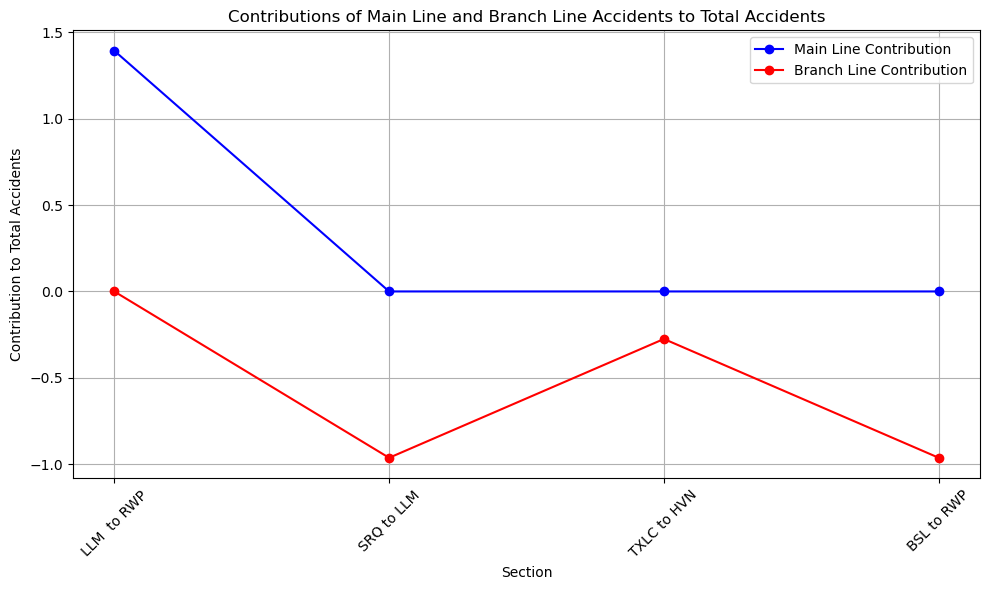

In [19]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Rawalpindi.xlsx'
sheet_name = 'type of line'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Define the dependent (response) variable
y = df['No_of_Accidents']

# Fit GLM with Main Line only
X_main_line = sm.add_constant(df[['Main_Line']])
glm_poisson_main_line = sm.GLM(y, X_main_line, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_main_line_results = glm_poisson_main_line.fit()

# Fit GLM with Branch Line only
X_branch_line = sm.add_constant(df[['Branch_Line']])
glm_poisson_branch_line = sm.GLM(y, X_branch_line, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_branch_line_results = glm_poisson_branch_line.fit()

# Calculate contributions
df['Main_Line_Contribution'] = df['Main_Line'] * glm_poisson_main_line_results.params['Main_Line']
df['Branch_Line_Contribution'] = df['Branch_Line'] * glm_poisson_branch_line_results.params['Branch_Line']

# Plotting the contributions
plt.figure(figsize=(10, 6))
plt.plot(df['Section'], df['Main_Line_Contribution'], marker='o', linestyle='-', color='b', label='Main Line Contribution')
plt.plot(df['Section'], df['Branch_Line_Contribution'], marker='o', linestyle='-', color='r', label='Branch Line Contribution')
plt.xlabel('Section')
plt.ylabel('Contribution to Total Accidents')
plt.title('Contributions of Main Line and Branch Line Accidents to Total Accidents')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('contributions_to_total_accidents.png')
plt.show()


   Year  No_of_Accidents  Passenager_train  Goods_Train  Other_Train
0  2016               24                19            4            1
1  2017                5                 3            2            0
2  2018               11                 5            4            2
3  2019               18                15            3            0
4  2020                8                 7            1            0
5  2021                9                 8            1            0
GLM Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.081
Date:                Sun

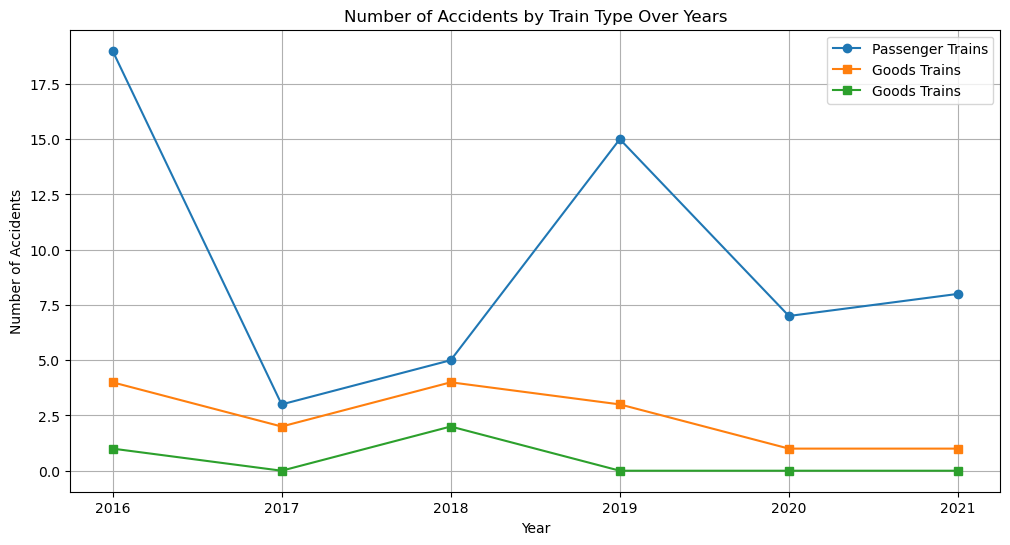

In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Rawalpindi.xlsx'
sheet_name = 'Types of Train'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')
print(df)
# Prepare data for GLM
# Define the dependent variable and independent variables
X = df[['Passenager_train', 'Goods_Train','Other_Train']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the GLM model with Poisson family
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary
print("GLM Model Summary:")
print(results.summary())

# Print additional metrics
print(f"Deviance: {results.deviance}")
print(f"AIC: {results.aic}")

# Calculate and print Pseudo R-squared (McFadden)
null_model = sm.GLM(y, sm.add_constant(pd.DataFrame({'const': [1] * len(y)})), family=sm.families.Poisson()).fit()
null_deviance = null_model.deviance
pseudo_r_squared = 1 - (results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Plotting the number of accidents by train type over years
plt.figure(figsize=(12, 6))

# Plot number of accidents for Passenger trains
plt.plot(df['Year'], df['Passenager_train'], marker='o', label='Passenger Trains')

# Plot number of accidents for Goods trains
plt.plot(df['Year'], df['Goods_Train'], marker='s', label='Goods Trains')
plt.plot(df['Year'], df['Other_Train'], marker='s', label='Goods Trains')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Train Type Over Years')
plt.legend()
plt.grid(True)
plt.xticks(df['Year'])  # Ensure all years are shown on the x-axis
plt.savefig('accidents_by_train_type_over_years.png')
plt.show()


   Year  No_of_Accidents  No_Damge_to_PR  Cause_Damge_to_PR  Cost_of_Damage
0  2016               24              16                  8         2161000
1  2017                5               2                  3          346000
2  2018               11               7                  4         1936000
3  2019               18              10                  8          986000
4  2020                8               4                  4         1713000
5  2021                9               3                  6        20726000
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1

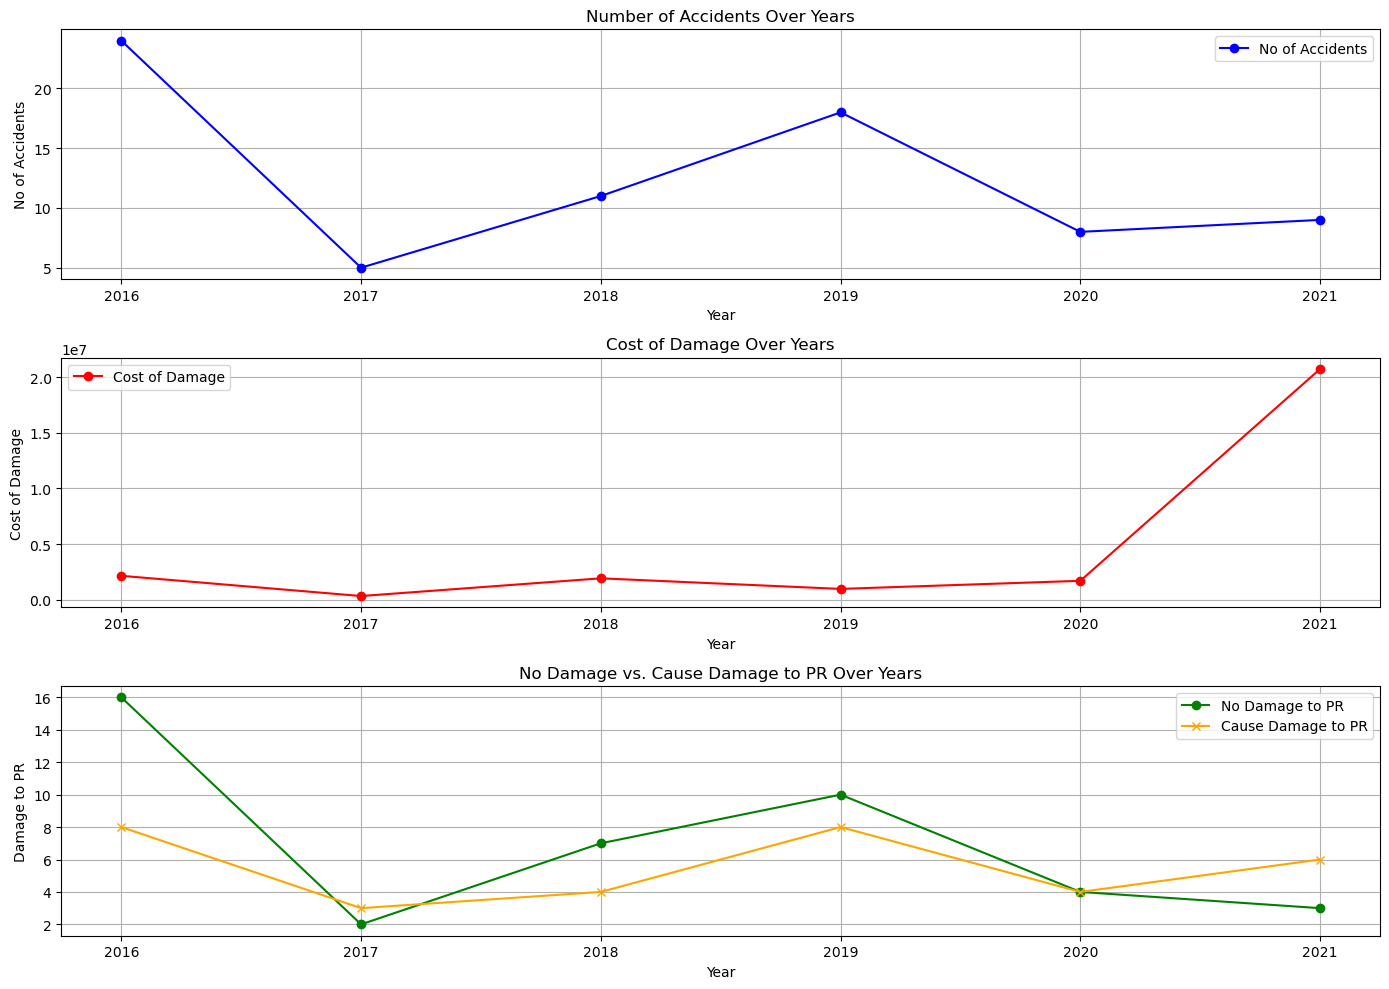

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Rawalpindi.xlsx'
sheet_name = 'Cost of Damage'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Verify the updated column names
print(df)  # Should now show the names with underscores

# Prepare data for GLM
# Define the dependent variable (Cost_of_Damage) and independent variables
X = df[['Cost_of_Damage', 'No_Damge_to_PR', 'Cause_Damge_to_PR']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the GLM model with Poisson family
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary of the model
print(results.summary())

# Extract and print model metrics
deviance = results.deviance
aic = results.aic
pseudo_r_squared = 1 - (deviance / results.null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

print(f"Deviance: {deviance}")
print(f"AIC: {aic}")
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Plotting the graphs

# Plot 1: Number of Accidents and Cost of Damage over Years
plt.figure(figsize=(14, 10))

# Number of Accidents
plt.subplot(3, 1, 1)
plt.plot(df['Year'], df['No_of_Accidents'], marker='o', label='No of Accidents', color='blue')
plt.xlabel('Year')
plt.ylabel('No of Accidents')
plt.title('Number of Accidents Over Years')
plt.grid(True)
plt.legend()

# Cost of Damage
plt.subplot(3, 1, 2)
plt.plot(df['Year'], df['Cost_of_Damage'], marker='o', label='Cost of Damage', color='red')
plt.xlabel('Year')
plt.ylabel('Cost of Damage')
plt.title('Cost of Damage Over Years')
plt.grid(True)
plt.legend()

# Comparisons
plt.subplot(3, 1, 3)
plt.plot(df['Year'], df['No_Damge_to_PR'], marker='o', label='No Damage to PR', color='green')
plt.plot(df['Year'], df['Cause_Damge_to_PR'], marker='x', label='Cause Damage to PR', color='orange')
plt.xlabel('Year')
plt.ylabel('Damage to PR')
plt.title('No Damage vs. Cause Damage to PR Over Years')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('cost_of_damage_analysis.png')
plt.show()


   Year  No_of_Accidents  No_Casulties  Casulties  No_of_Deaths  \
0  2016               24            21          3             4   
1  2017                5             4          1             1   
2  2018               11            11          0             0   
3  2019               18            10          8             5   
4  2020                8             6          2             2   
5  2021                9             6          3             3   

   No_of_Injuries  
0               4  
1               0  
2               0  
3              10  
4               2  
5               5  

Model Summary for Number of Casualties:
                 Generalized Linear Model Regression Results                  
Dep. Variable:           No_Casulties   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                 Poisson   Df Model:                            1
Link Function:                   

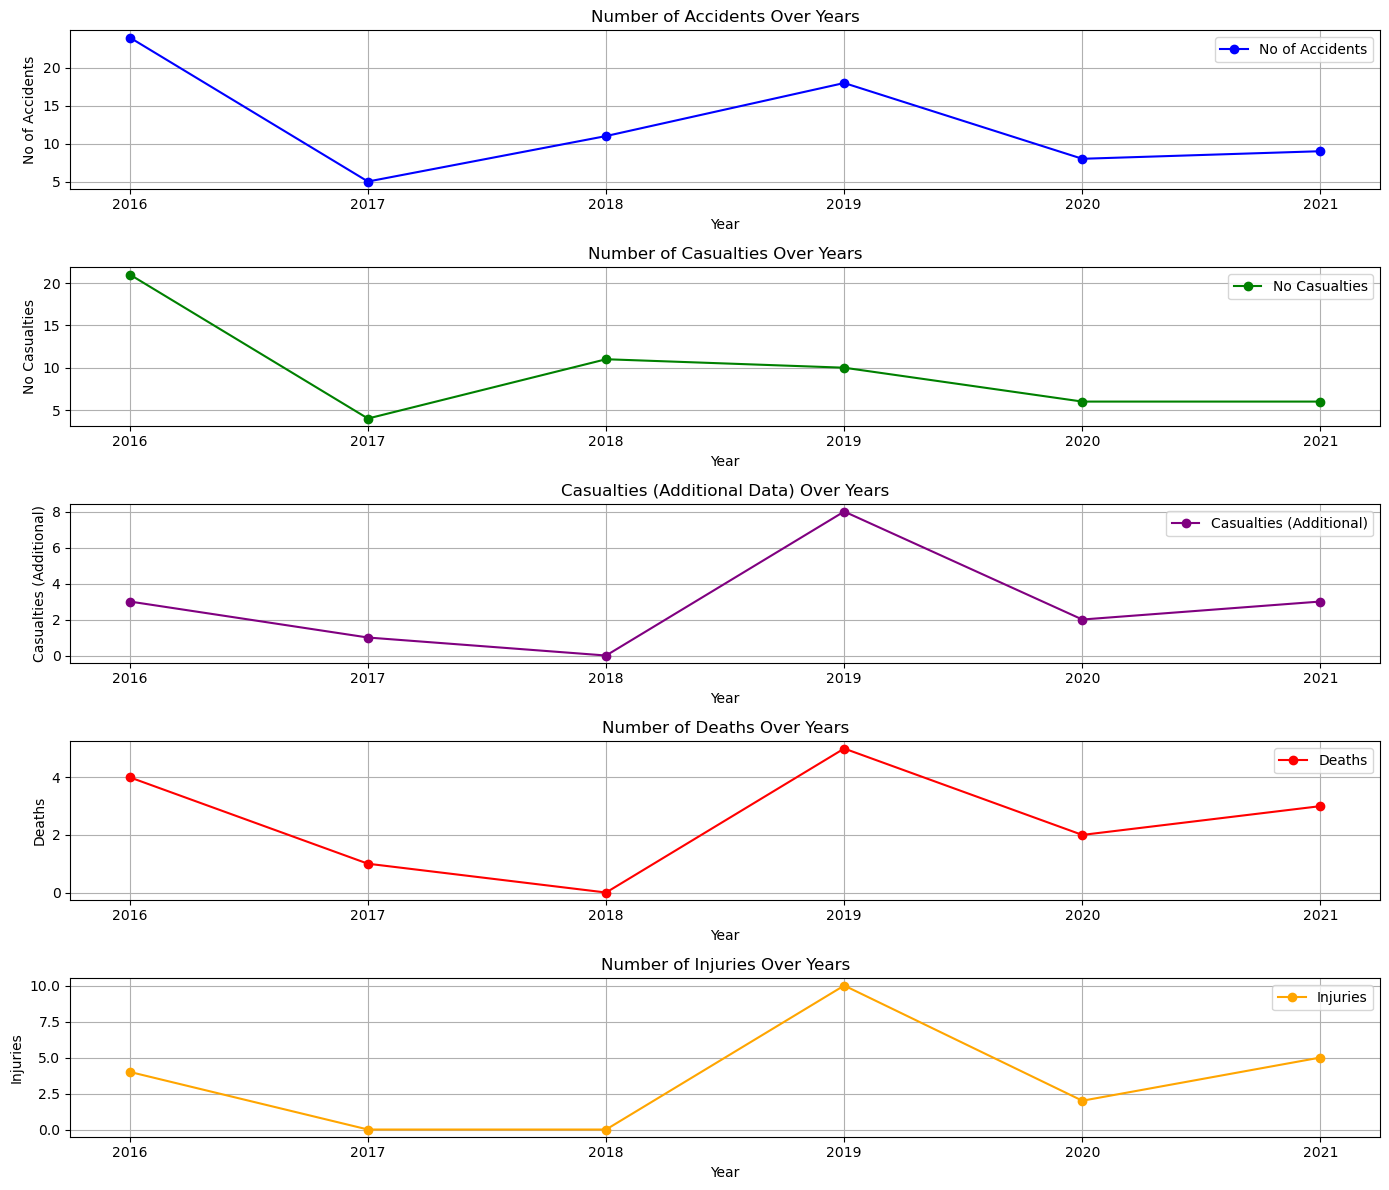

In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Rawalpindi.xlsx'
sheet_name = 'Severity'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Rename columns to remove extra spaces and make them consistent
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Verify column names after renaming
print(df)

# Define dependent variables and independent variable
X = df[['No_of_Accidents']]
y_casualties = df['No_Casulties']
y_casualties_alt = df['Casulties']
y_deaths = df['No_of_Deaths']
y_injuries = df['No_of_Injuries']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit GLM model for each severity measure
model_casualties = sm.GLM(y_casualties, X, family=sm.families.Poisson()).fit()
model_casualties_alt = sm.GLM(y_casualties_alt, X, family=sm.families.Poisson()).fit()
model_deaths = sm.GLM(y_deaths, X, family=sm.families.Poisson()).fit()
model_injuries = sm.GLM(y_injuries, X, family=sm.families.Poisson()).fit()

# Print the summary for each model
print("\nModel Summary for Number of Casualties:")
print(model_casualties.summary())

print(f"Deviance: {model_casualties.deviance}")
print(f"AIC: {model_casualties.aic}")
print(f"Log-Likelihood: {model_casualties.llf}")

print("\nModel Summary for Number of Casualties (Alternative):")
print(model_casualties_alt.summary())

print(f"Deviance: {model_casualties_alt.deviance}")
print(f"AIC: {model_casualties_alt.aic}")
print(f"Log-Likelihood: {model_casualties_alt.llf}")

print("\nModel Summary for Number of Deaths:")
print(model_deaths.summary())

print(f"Deviance: {model_deaths.deviance}")
print(f"AIC: {model_deaths.aic}")
print(f"Log-Likelihood: {model_deaths.llf}")

print("\nModel Summary for Number of Injuries:")
print(model_injuries.summary())

print(f"Deviance: {model_injuries.deviance}")
print(f"AIC: {model_injuries.aic}")
print(f"Log-Likelihood: {model_injuries.llf}")

# Plotting the graphs

# Plot 1: Number of Accidents, Casualties, Deaths, and Injuries over Years
plt.figure(figsize=(14, 12))

# Number of Accidents
plt.subplot(5, 1, 1)
plt.plot(df['Year'], df['No_of_Accidents'], marker='o', label='No of Accidents', color='blue')
plt.xlabel('Year')
plt.ylabel('No of Accidents')
plt.title('Number of Accidents Over Years')
plt.grid(True)
plt.legend()

# Number of Casualties
plt.subplot(5, 1, 2)
plt.plot(df['Year'], df['No_Casulties'], marker='o', label='No Casualties', color='green')
plt.xlabel('Year')
plt.ylabel('No Casualties')
plt.title('Number of Casualties Over Years')
plt.grid(True)
plt.legend()

# Casualties (Additional Data)
plt.subplot(5, 1, 3)
plt.plot(df['Year'], df['Casulties'], marker='o', label='Casualties (Additional)', color='purple')
plt.xlabel('Year')
plt.ylabel('Casualties (Additional)')
plt.title('Casualties (Additional Data) Over Years')
plt.grid(True)
plt.legend()

# Number of Deaths
plt.subplot(5, 1, 4)
plt.plot(df['Year'], df['No_of_Deaths'], marker='o', label='Deaths', color='red')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Number of Deaths Over Years')
plt.grid(True)
plt.legend()

# Number of Injuries
plt.subplot(5, 1, 5)
plt.plot(df['Year'], df['No_of_Injuries'], marker='o', label='Injuries', color='orange')
plt.xlabel('Year')
plt.ylabel('Injuries')
plt.title('Number of Injuries Over Years')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('severity_analysis_all.png')
plt.show()


   Season  No_of_Accidents
0  Winter               30
1  Spring                9
2  Summer               22
3   Autam               14
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    4
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11.245
Date:                Sun, 04 Aug 2024   Deviance:                       3.7657
Time:                        11:25:35   Pearson chi2:                     3.50
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9195
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.

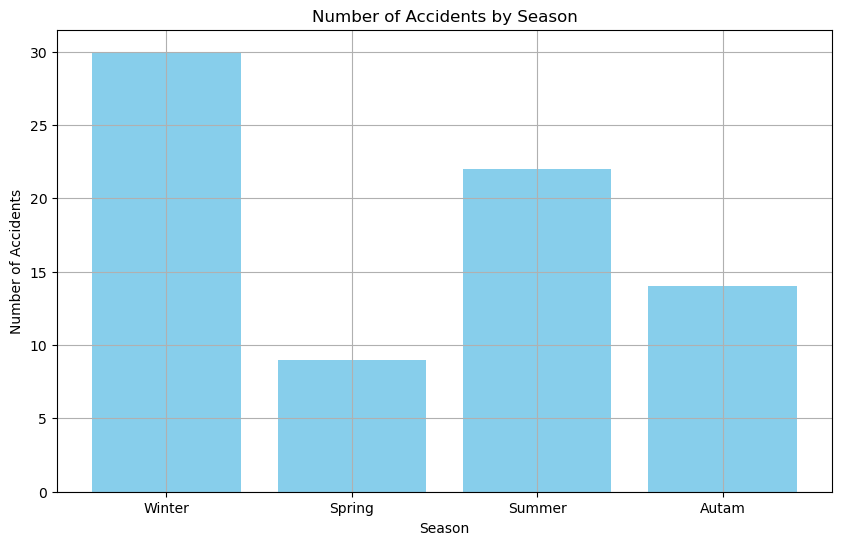

In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Rawalpindi.xlsx'
sheet_name = 'Season'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Verify the updated column names
print(df)  # Should now show the names with underscores

# Encode the categorical variable 'Season'
df['Season'] = df['Season'].astype('category')
df['Season_code'] = df['Season'].cat.codes

# Define the dependent variable (No_of_Accidents) and independent variable (Season_code)
X = df[['Season_code']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the GLM model with Poisson family
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary of the model
print(results.summary())

# Extract and print model metrics
deviance = results.deviance
aic = results.aic
pseudo_r_squared = 1 - (deviance / results.null_deviance)
print(f"Deviance: {deviance}")
print(f"AIC: {aic}")
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Plotting the graphs

# Plot 1: Number of Accidents over Seasons
plt.figure(figsize=(10, 6))
plt.bar(df['Season'], df['No_of_Accidents'], color='skyblue')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Season')
plt.grid(True)
plt.savefig('accidents_by_season.png')
plt.show()
